In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

customer_data = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn 2.csv")
customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [58]:
customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [59]:
customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [60]:
customer_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
#data cleaning
customer_data["SeniorCitizen"] = customer_data.apply(lambda row: True if row["SeniorCitizen"] == 1 else False, axis=1)
customer_data["Churn"] = customer_data.apply(lambda row: True if row["Churn"] == 'Yes' else False, axis=1)
customer_data["TotalCharges"] = customer_data.apply(lambda row: float(row["TotalCharges"]) if row["TotalCharges"] != ' ' else 0.0, axis=1)

customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,5575-GNVDE,Male,False,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,3668-QPYBK,Male,False,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,9237-HQITU,Female,False,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,False
7039,2234-XADUH,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,False
7040,4801-JZAZL,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,False
7041,8361-LTMKD,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,True


In [ ]:
#Exploratory data analysis

In [62]:
#let's see what the data looks like
customer_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


The data is positively skewed.  
The average tenure is 32 months, so an equivalent of almost 3 years  
Standard Deviation: The standard deviation is approximately 25 months. This value tells us, on average, how much each customer tenure  differ from the mean number of months within the company.

**Monthly Charges**
The average charge is 64 $.
The standard deviation is approximatively 30$; on average, each customer can be charged 30$ more or less from the average charge value

**TotalCharges**


Text(0.5, 1.0, 'TotalCharges')

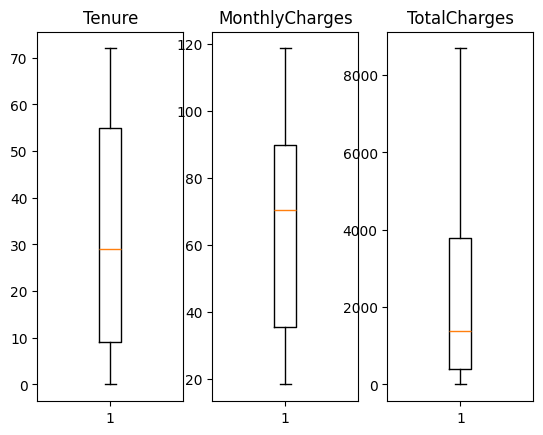

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(customer_data['tenure'])
axes[0].set_title("Tenure")

axes[1].boxplot(customer_data['MonthlyCharges'])
axes[1].set_title("MonthlyCharges")

axes[2].boxplot(customer_data['TotalCharges'])
axes[2].set_title("TotalCharges")

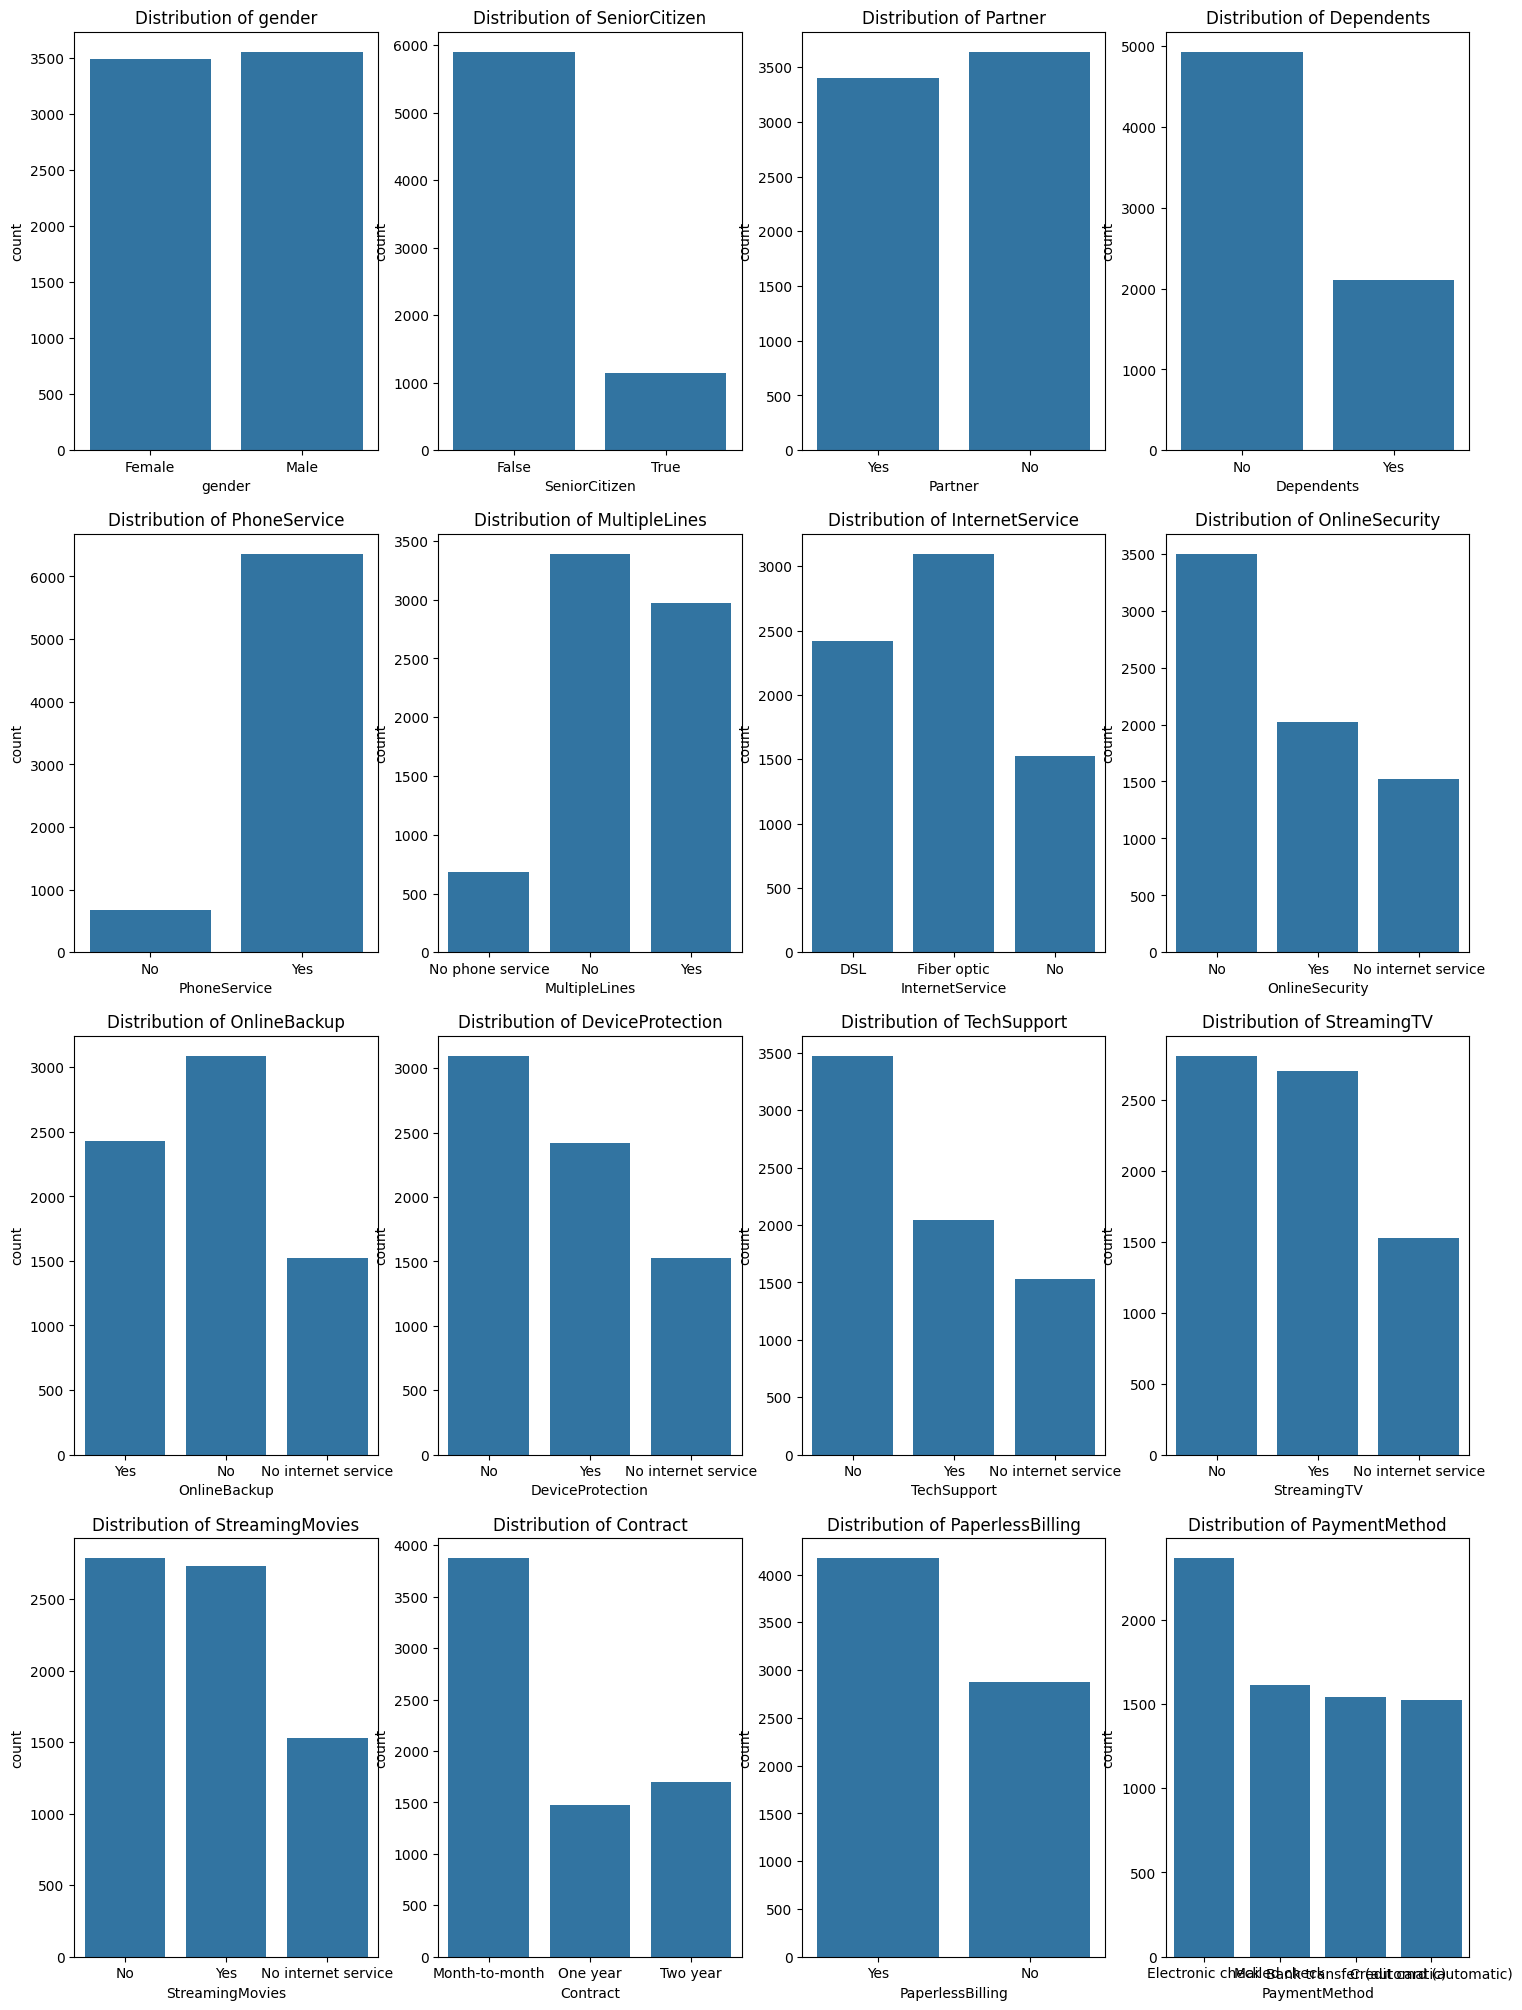

In [65]:
fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(18, 25))
xdata = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

axes = axes.flatten()

# Plot boxplots for each grouping column
for i, col in enumerate(xdata):
    sns.countplot(x=col, data=customer_data, ax=axes[i])
    #axes[i].pie(customer_data[col].value_counts(), autopct='%1.1f%%')#hist(customer_data[col])
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout
plt.show()

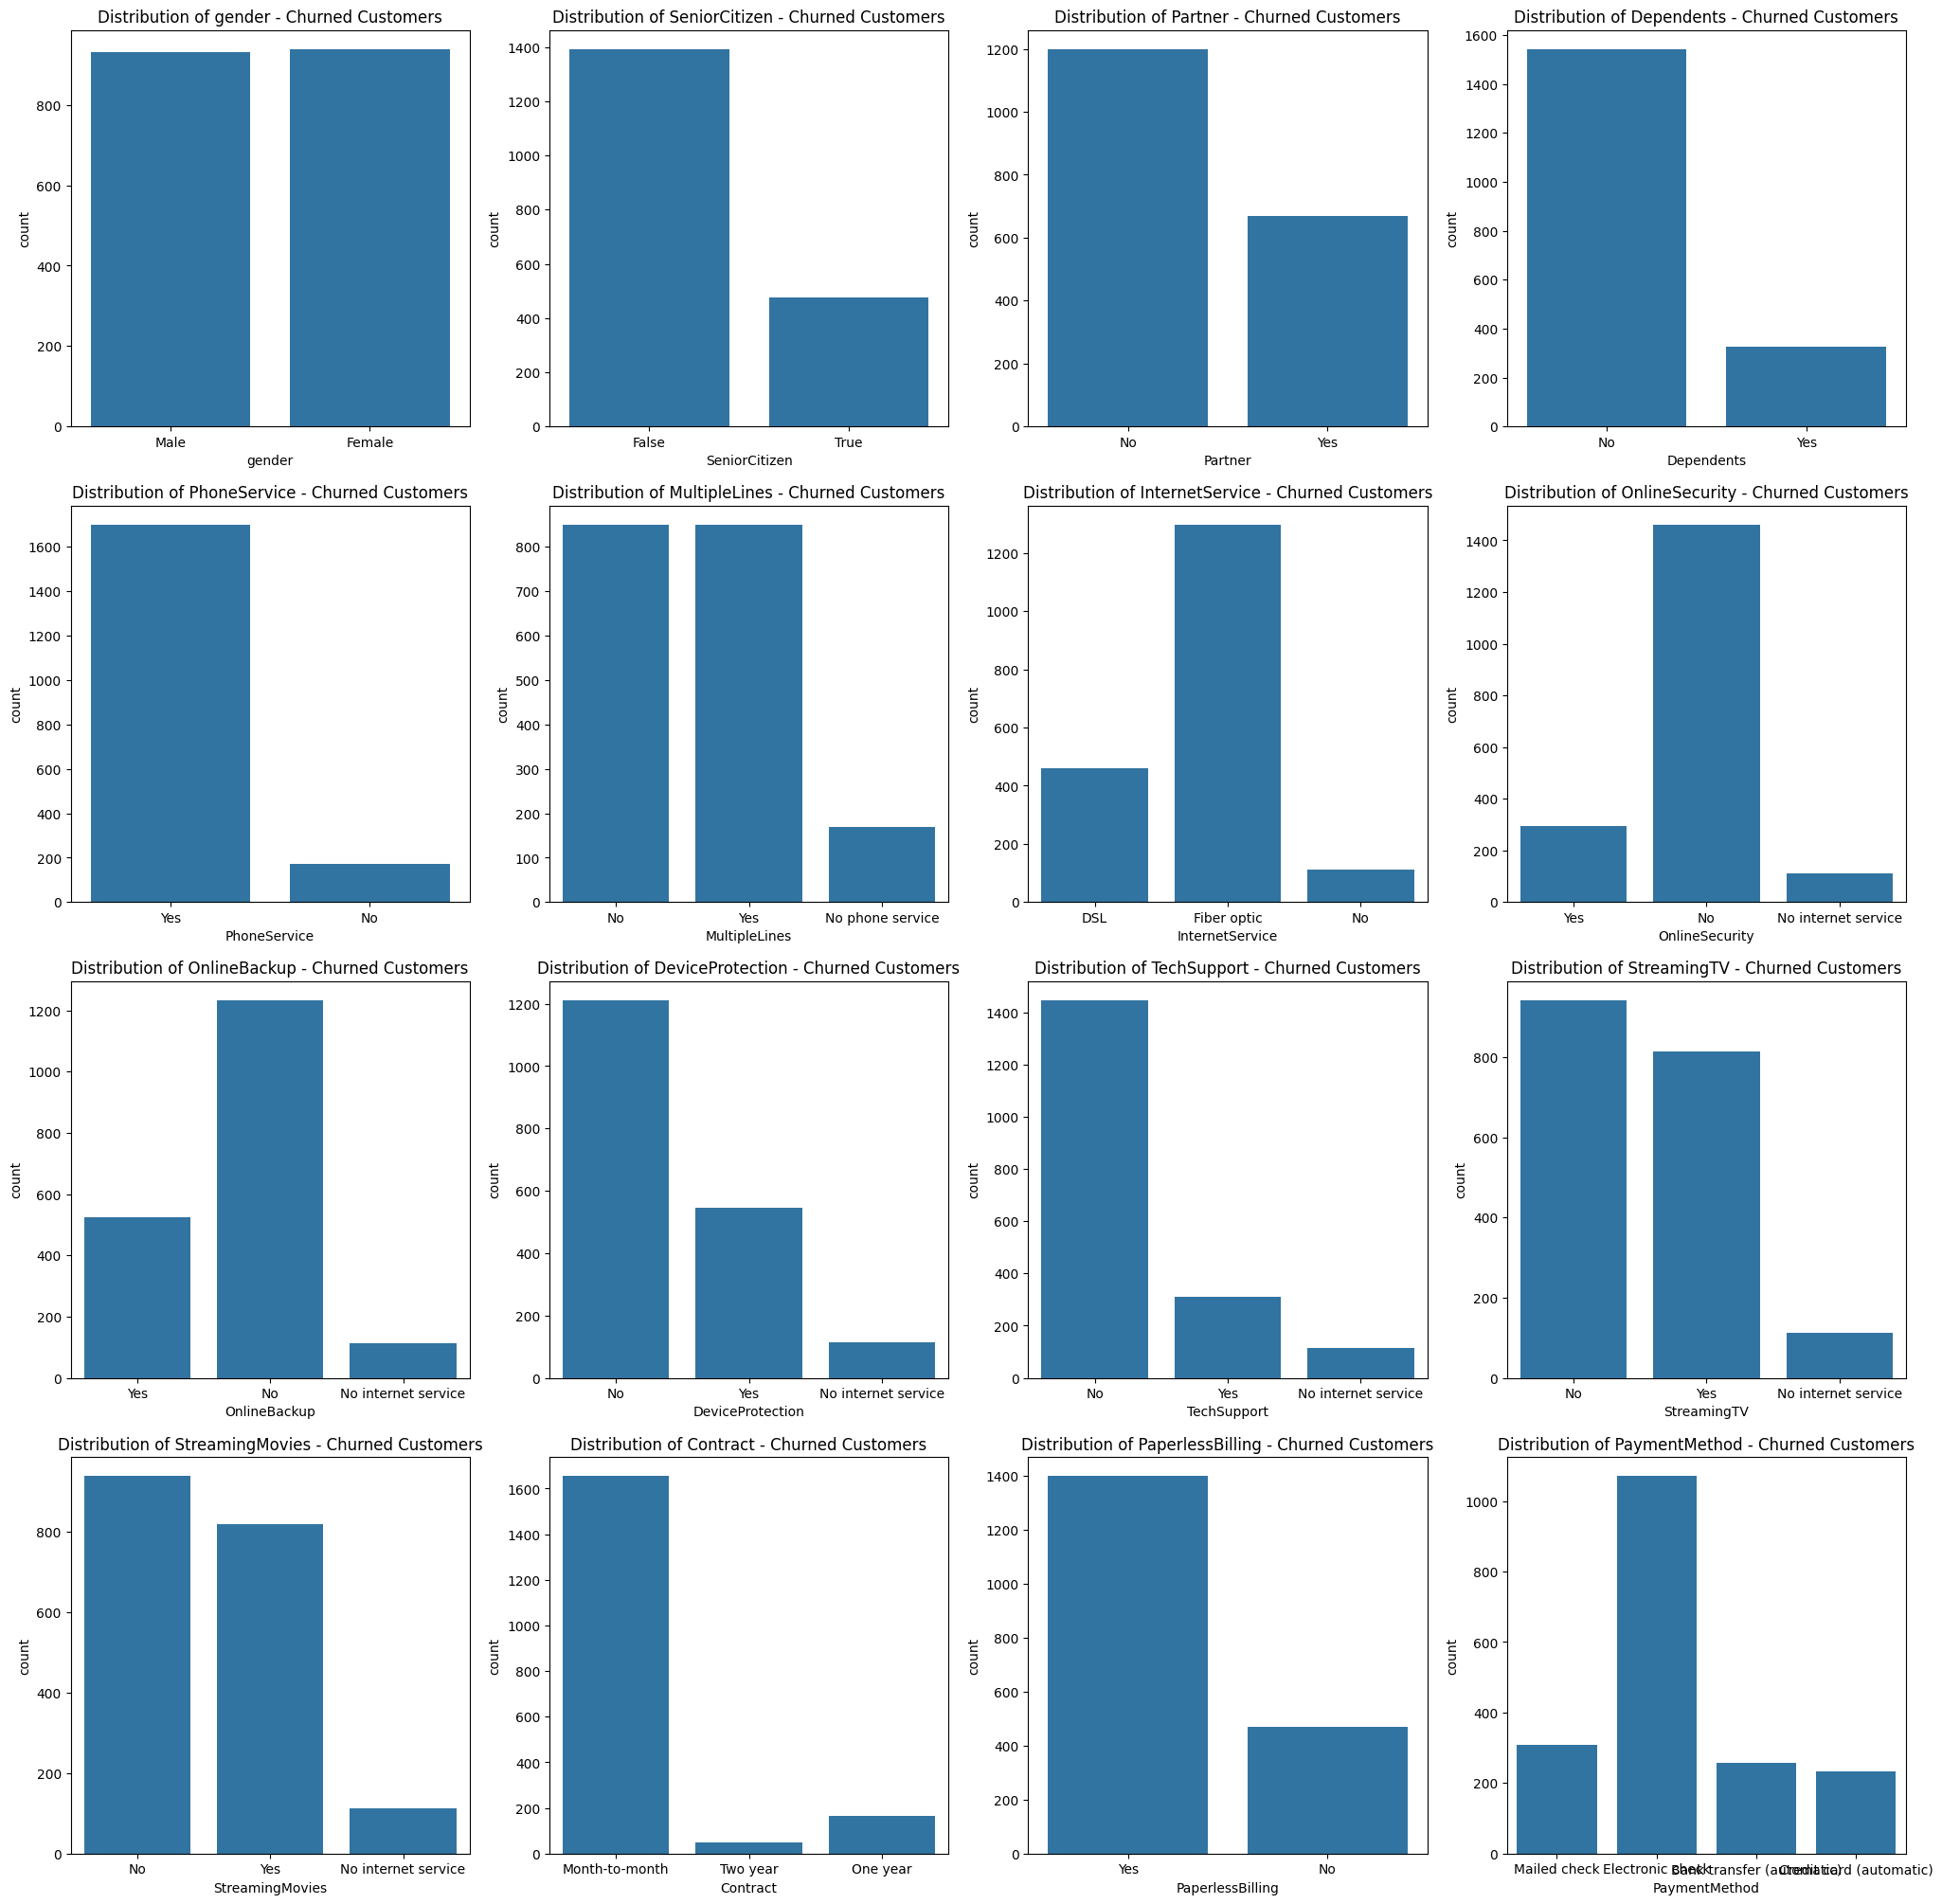

In [67]:
#let's see what the categorical data looks like for the customer that churned

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(25, 25))

axes = axes.flatten()

# Plot boxplots for each grouping column
for i, col in enumerate(xdata):
    sns.countplot(x=col, data=customer_data[customer_data["Churn"] == True], ax=axes[i])
    #axes[i].pie(customer_data[col].value_counts(), autopct='%1.1f%%')#hist(customer_data[col])
    axes[i].set_title(f"Distribution of {col} - Churned Customers")

# Adjust layout
plt.show()

**Gender**   
There is slightly more women amongst the churned customers  
**Senior Citizenship, Partner, Phone Service**  
The distribution is very similar to the general one  
**Multiple Lines, Internet Service**  
Very few people do not have phone or internet service
**Online Security, Online Backup, Device Protection, TechSupport, StreamingTV**  
The distribution here is not that different than the general's apart from the fact that the "No" category is more present. Churned customers mostly don't have online security or online backup. The same goes for device protection, tech support or streamingTV.  
**Contract**  
Most of the churned customers have month-to-month contracts. They are less likely to churn on a two-year contract. This distribution is different than the general's so we can establish the hypothesis that **the type of contract influences the churn**  

In [68]:
#let's see if the tenure, the monthly charges or the total charges are different for the churned customers
customer_data[customer_data["Churn"] == True].describe()

,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


Text(0.5, 1.0, 'TotalCharges')

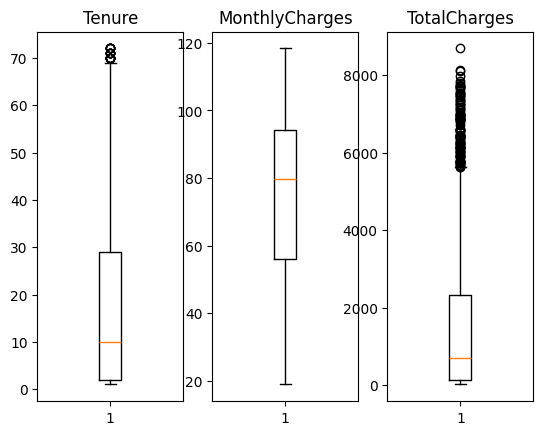

In [69]:
#let's visualize
churned_cdata = customer_data[customer_data["Churn"] == True]
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(churned_cdata['tenure'])
axes[0].set_title("Tenure")

axes[1].boxplot(churned_cdata['MonthlyCharges'])
axes[1].set_title("MonthlyCharges")

axes[2].boxplot(churned_cdata['TotalCharges'])
axes[2].set_title("TotalCharges")

For the original data, we had noticed that the data was positively skewed with no outliers.  
Here, we can see that:  
a- the only variable with no outliers is MonthlyCharged, where the data is now negatively skewed.  
b- Tenure: the median is around 10 months, while the median of the tenure in general is around 30 months. Churned customers tend to churn early, within their first year.  
c- Monthly Charges: The monthly charges median for churned customers is around 80 while a little over 70 on a general basis. The difference isn't dramatic, so the monthly charges might not be a strong churn drive  
d- Churned Customers: Median much lower, around 800–1000.  
Many outliers (some churned despite high total charges, possibly long-term customers suddenly leaving). Total charges are low for most churned customers → they didn't stay long enough to accumulate big bills.  
This confirms the tenure-churn relationship again. TotalCharges is basically a proxy for tenure in this case.

Text(0.5, 1.0, 'TotalCharges')

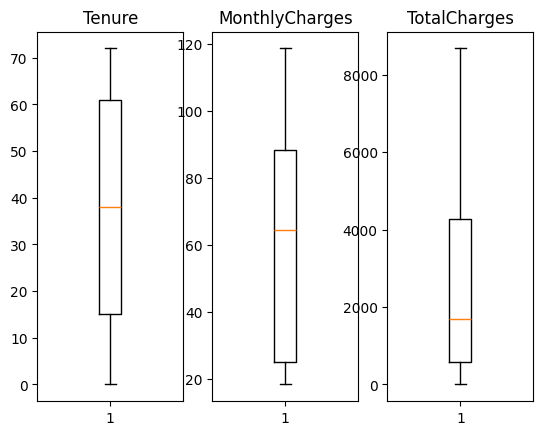

In [70]:
#let's observe the numeriacal values for the retained customers
retained = customer_data[customer_data["Churn"] == False]

fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(retained['tenure'])
axes[0].set_title("Tenure")

axes[1].boxplot(retained['MonthlyCharges'])
axes[1].set_title("MonthlyCharges")

axes[2].boxplot(retained['TotalCharges'])
axes[2].set_title("TotalCharges")

This result shows once again the importance of tenure in the retention of customers.  
Retained customer stays within the company a little less than 40 months, while churned customers tend to go after only 10 months.  
The monthly charges are around 65-70 and the TotalCharges median is around 1800, which according to the general graph corresponds to the average total value charged for a normally retained customer.

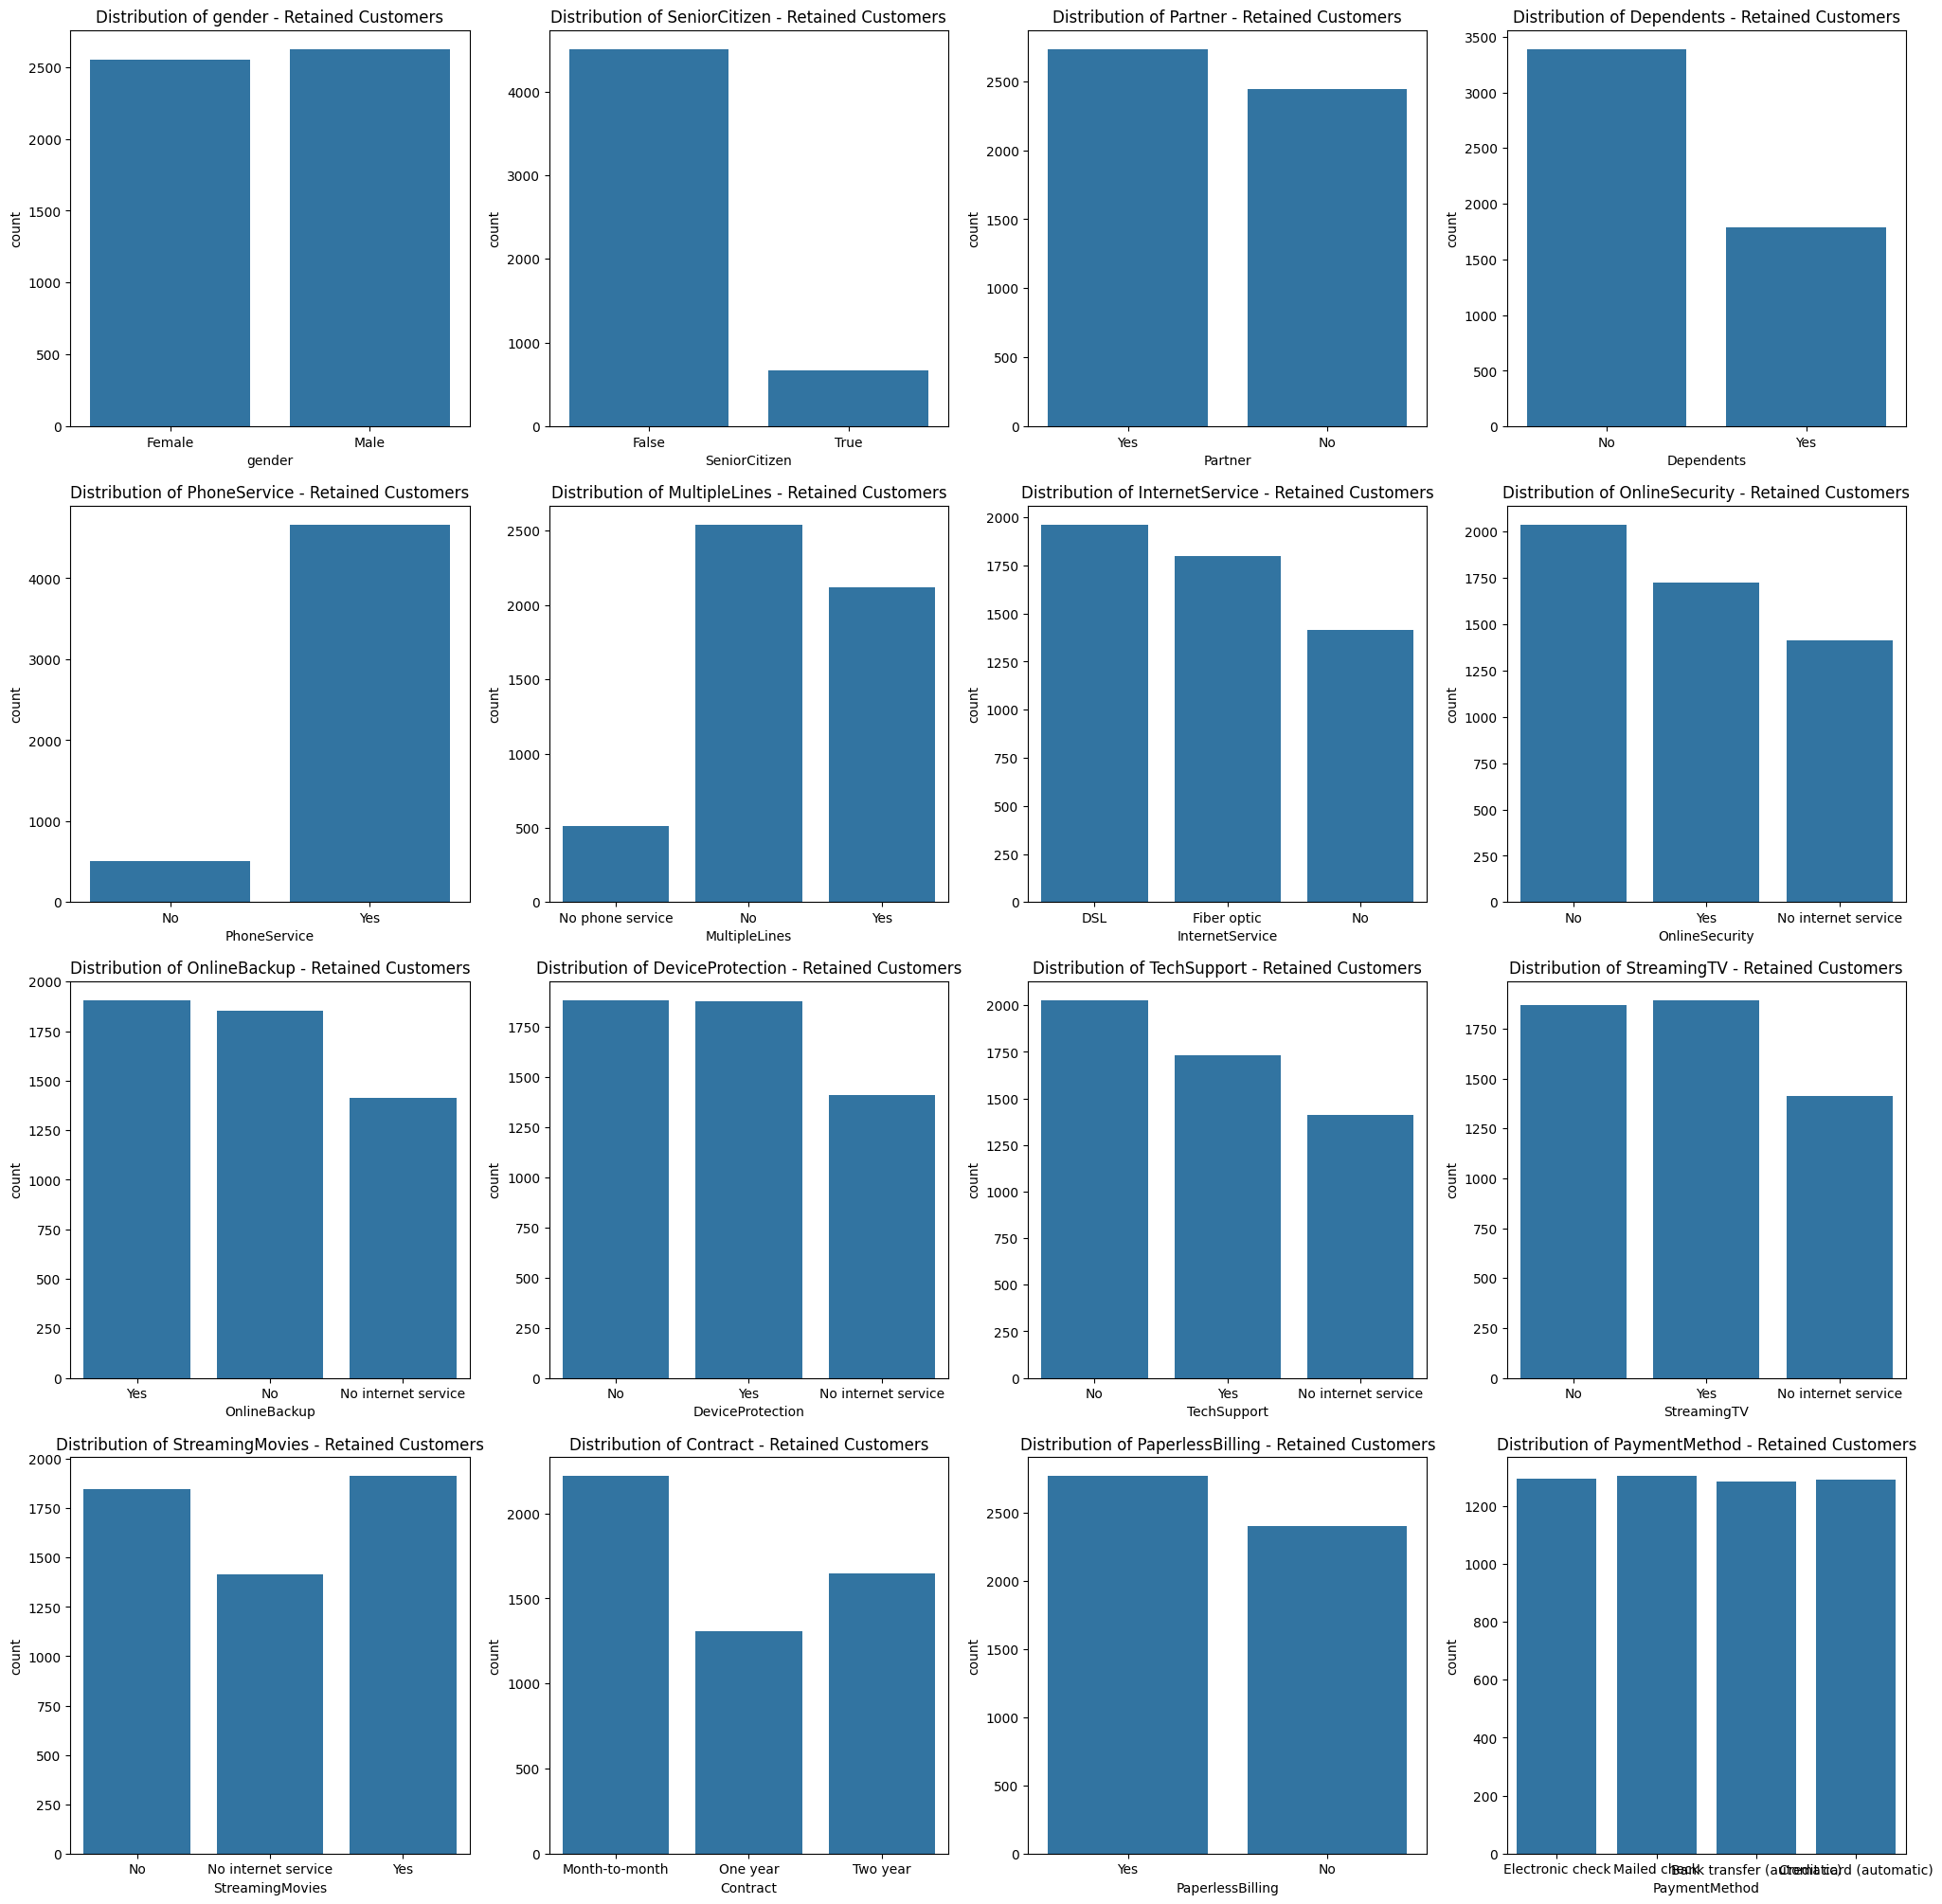

In [72]:
#let's see what the categorical data looks like for the customer that churned

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(25, 25))

axes = axes.flatten()

# Plot boxplots for each grouping column
for i, col in enumerate(xdata):
    sns.countplot(x=col, data=retained, ax=axes[i])
    #axes[i].pie(customer_data[col].value_counts(), autopct='%1.1f%%')#hist(customer_data[col])
    axes[i].set_title(f"Distribution of {col} - Retained Customers")

# Adjust layout
plt.show()

From both the graphics, we notice that:  
a- There are more senior citizens in the group of churned customers than the one of retained customers  
b- Most of those who stayed have a partner whereas for the churned customers, they mostly do not have a partner  
c- The retained customers group also has a greater quantity of people with dependants  
d- The retained customers group has a greater proportion of people with no multiple lines. For the churned customers, the proportions of people with and without multiple lines was almost equal  
e- Most retained use DSL as Internet Service whereas Churned customers tend to use Fiber Optic more.  
f- Regarding the Online Security/TechSupport/Online Backup/Device Protection, more people have it enabled for the retained customers, it goes to show it plays a great role in customer satisfaction  
g- Retained customer use Streaming services slightly more than the ones that churned  
h- Retained customers tend to establish 1-2 years contracts, while churned customers often opts for monthly contracts. People with shorter contracts are more likely to churn.   
i- Retained Customers use more of paper billing, suggesting that the less human contact, the more likely customers are to churn (impossibility of asking questions, etc)  
j- Churned customers are strongly represented by the Electronic check payment method. The retained customers on the other hand have more diverse payment methods, with stronger use of Mailed Check. It can be associated with better retention.

In [84]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#let's visualise the correlation using a heatmap

#data normalisation/standardisation of numerical values
scaler = StandardScaler()
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
num_data = scaler.fit_transform(customer_data[num_cols])

cat_cols = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","Churn"]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
cat_data = encoder.fit_transform(customer_data[cat_cols])
cat_feature_names = encoder.get_feature_names_out(cat_cols)
# Get feature names and strip them
original_features = [name.split('_')[0] for name in encoder.get_feature_names_out(cat_cols)]


processed_data = pd.DataFrame(np.hstack([num_data, cat_data]), 
                              columns= num_cols + list(cat_feature_names),
                              index=customer_data.index)


In [80]:
from scipy.stats import pointbiserialr

num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
#ce dictionnaire contient les correlations et p-value de chaque variable avec Churn
churn_corr_dic = {}

for col in num_cols:
    corr, p_value = pointbiserialr(customer_data['Churn'].map({True: 1, False: 0}), customer_data[col])
    churn_corr_dic["Feature"] = col
    churn_corr_dic["Correlation"] = corr
    churn_corr_dic["p-value"] = p_value
    print(f"Correlation of {col} with Churn: ", corr)
    print("p-value: ", p_value)



Correlation of tenure with Churn:  -0.352228670113078
p-value:  7.999057960587877e-205
Correlation of MonthlyCharges with Churn:  0.19335642223784702
p-value:  2.7066456068883436e-60
Correlation of TotalCharges with Churn:  -0.19832426260399555
p-value:  2.1272116132401364e-63


**r = -0.35** for the tenure indicates a moderate negative correlation. This means that **as tenure increases, the likelihood of churning (Churn = True) slightly decreases, and conversely, as tenure decreases, the likelihood of churning increases**.  
The negative value implies that a higher tenure is associated with a lower probability of churn  

In [ ]:
#ANOVA
from scipy.stats import f_oneway

groups = [customer_data['tenure'][customer_data['Churn'] == cat] for cat in customer_data['Churn'].unique()]
f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 997.2680104991438
p-value: 7.999057960610892e-205


The results from ANOVA suggest that the difference of tenure between the churned and non-churned is significant, which we had observed early on. The median tenure for churned customers was 10 months, while going up to 30 months for the remaining customers

In [83]:
#let's see the correlation between the categorical data anc Churn
from scipy.stats import chi2_contingency

for cat in xdata:
    contingency_table = pd.crosstab(customer_data["Churn"], customer_data[cat])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    print(f"The p-value for the test between Churn and {cat} is {p}")
    print(f"Chi2 Statistic for the test between Churn and {cat}:", stat)
    print(f"Degrees of Freedom for the test between Churn and {cat}:", dof)
    print(f"Expected frequencies for the test between Churn and {cat}:\n", expected)


The p-value for the test between Churn and gender is 0.48657873605618596
Chi2 Statistic for the test between Churn and gender: 0.4840828822091383
Degrees of Freedom for the test between Churn and gender: 1
Expected frequencies for the test between Churn and gender:
 [[2562.38989067 2611.61010933]
 [ 925.61010933  943.38989067]]
The p-value for the test between Churn and SeniorCitizen is 1.510066805092378e-36
Chi2 Statistic for the test between Churn and SeniorCitizen: 159.42630036838742
Degrees of Freedom for the test between Churn and SeniorCitizen: 1
Expected frequencies for the test between Churn and SeniorCitizen:
 [[4335.05239245  838.94760755]
 [1565.94760755  303.05239245]]
The p-value for the test between Churn and Partner is 2.1399113440759935e-36
Chi2 Statistic for the test between Churn and Partner: 158.7333820309922
Degrees of Freedom for the test between Churn and Partner: 1
Expected frequencies for the test between Churn and Partner:
 [[2674.78830044 2499.21169956]
 [ 966

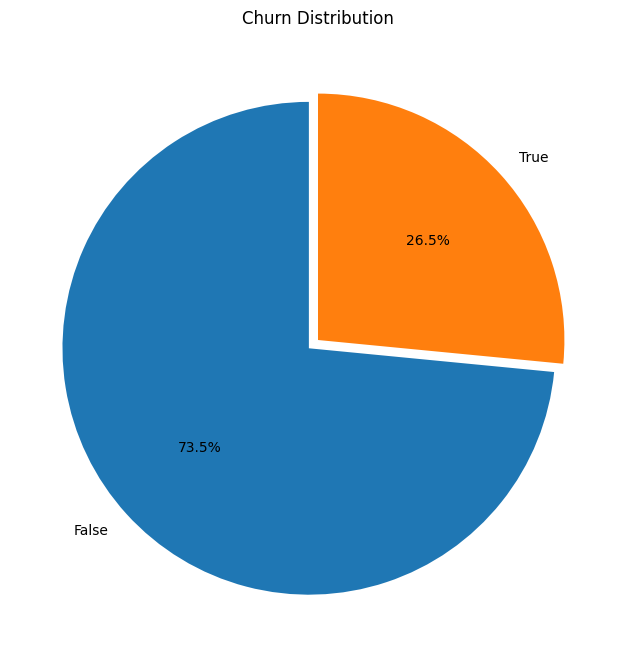

In [86]:
fig = plt.figure(figsize=(8,8))

churn_count = customer_data["Churn"].value_counts()

plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=90, explode=(0.05, 0))
plt.title("Churn Distribution")
plt.show()

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score

# ---------- columns ----------
num_cols = ['tenure', "MonthlyCharges",'TotalCharges']
#cat_cols = ["SeniorCitizen","Partner","Dependents","MultipleLines","InternetService",
#            "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
#            "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
cat_cols = ["SeniorCitizen","Dependents","InternetService",
            "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
            "Contract","PaperlessBilling","PaymentMethod"]

X = customer_data[num_cols + cat_cols]   # features only
y = customer_data['Churn'].map({False: 0, True: 1})   # binary label

# ---------- preprocessors ----------
numeric_pipe = StandardScaler()
categorical_pipe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

preprocess = ColumnTransformer([
    ('num', numeric_pipe, num_cols),
    ('cat', categorical_pipe, cat_cols)
])

# ---------- full model pipeline ----------
logreg_clf = Pipeline([
    ('prep', preprocess),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced'))  # class_weight helpful if churn is imbalanced
])

# ---------- train / test ----------
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42,
                                                    stratify=y)

logreg_clf.fit(X_train, y_train)

print("Accuracy:",  logreg_clf.score(X_test, y_test))


Accuracy: 0.7338537970191625


In [110]:
#let's try random forest to see if we have a better accuracy
from sklearn.preprocessing import OneHotEncoder


num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

#cat_cols = ["SeniorCitizen","Partner","Dependents","MultipleLines","InternetService",
#            "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
#            "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
cat_cols = ["SeniorCitizen","Dependents","InternetService",
            "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
            "Contract","PaperlessBilling","PaymentMethod"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),         # No scaling, pass numerical as-is
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ])

# Fit and transform the data
processed_data = preprocessor.fit_transform(customer_data)

cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_cols, cat_feature_names])

processed_df = pd.DataFrame(processed_data, columns=all_feature_names)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assume you have:
X = processed_df.copy()
y = customer_data['Churn'].map({False: 0, True: 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # probabilities for ROC AUC

# Evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Confusion Matrix:
 [[940  96]
 [191 182]]
ROC AUC Score: 0.8294041839618248


In [107]:
#Let's compute some kpis
retention_rate = customer_data[customer_data["Churn"] == False]["customerID"].count()/customer_data["customerID"].count()
print(f"Retention rate is: {retention_rate}")

Retention rate is: 0.7346301292063041
